In [35]:
import process_data 
import pandas as pd 


#import pokemon tier data that has been scraped from smogon
dataset = process_data.create_bulk_data_set()
print(dataset.shape)
print(dataset.columns)

(4330, 16)
Index(['Gen#', 'Name', 'Type1', 'Type2', 'Ability1', 'Ability2', 'Ability3',
       'Tier', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'O-Score', 'D-Score'],
      dtype='object')


In [36]:
# Remove columns that are not going to be used in the tier classifier
ds = dataset[["Gen#", "Name", "Tier", 
                      "HP", "Attack", "Defense", 
                      "Sp. Atk", "Sp. Def", "Speed",
                      "O-Score", "D-Score"]].copy()
ds.tail()

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score
4325,8,Zoroark,NU,60,105,60,120,60,105,18,18
4326,8,Zorua,LC,40,65,40,80,40,65,18,18
4327,8,Zubat,LC,40,45,35,30,40,55,18,18
4328,8,Zweilous,NFE,72,85,70,65,70,58,18,18
4329,8,Zygarde,Uber,108,100,121,81,95,95,18,18


In [37]:
ds["Stat Total"] = (ds["HP"] + ds["Attack"] + 
                    ds["Defense"] + ds["Sp. Atk"] + 
                    ds["Sp. Def"] + ds["Speed"])
ds.tail()

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
4325,8,Zoroark,NU,60,105,60,120,60,105,18,18,510
4326,8,Zorua,LC,40,65,40,80,40,65,18,18,330
4327,8,Zubat,LC,40,45,35,30,40,55,18,18,245
4328,8,Zweilous,NFE,72,85,70,65,70,58,18,18,420
4329,8,Zygarde,Uber,108,100,121,81,95,95,18,18,600


In [38]:
isTiered = ds['Tier'] != "Untiered"
ds = ds[isTiered]
ds.shape

(3811, 12)

In [39]:

# use less rows for simple display
isGen7 = ds["Gen#"]==7
# isNotLittleCup = ds["Tier"]!="LC"
data = ds[isGen7]
# data = data[isNotLittleCup]
data = data.dropna()
print(data.shape)
data.tail()


(642, 12)


,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
3433,7,Zoroark,RUBL,60,105,60,120,60,105,18,18,510
3434,7,Zorua,LC,40,65,40,80,40,65,18,18,330
3435,7,Zubat,LC,40,45,35,30,40,55,18,18,245
3436,7,Zweilous,NFE,72,85,70,65,70,58,18,18,420
3437,7,Zygarde,Uber,108,100,121,81,95,95,18,18,600


In [40]:
x= data["Stat Total"]

x

2634    494
2635    310
2636    465
2637    495
2638    520
       ... 
3433    510
3434    330
3435    245
3436    420
3437    600
Name: Stat Total, Length: 642, dtype: int64

In [41]:
y= data["Tier"]
y

2634      PU
2635      LC
2636      PU
2637      NU
2638    Uber
        ... 
3433    RUBL
3434      LC
3435      LC
3436     NFE
3437    Uber
Name: Tier, Length: 642, dtype: object

Text(0.5, 1.0, 'Pokemon Tier based on Stat Totals')

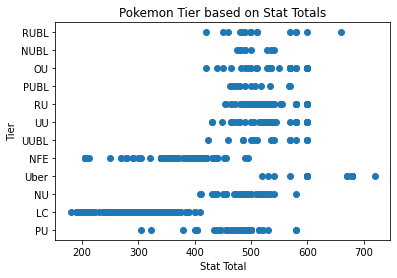

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt 



fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Stat Total")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on Stat Totals")




Text(0.5, 1.0, 'Pokemon Tier based on HP Stat')

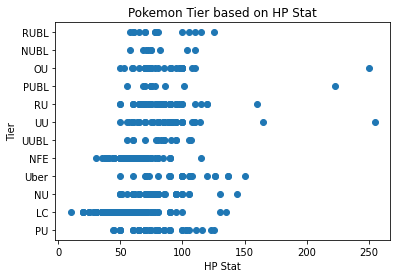

In [43]:
x = data["HP"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("HP Stat")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on HP Stat")

Text(0.5, 1.0, 'Pokemon Tier based on Attack Stat')

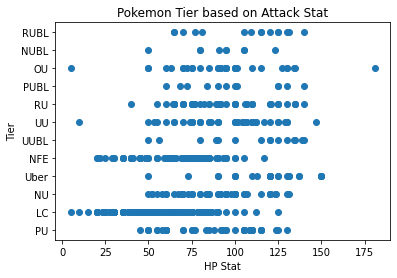

In [44]:
x = data["Attack"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("HP Stat")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on Attack Stat")

Text(0.5, 1.0, 'Pokemon Tier based on Defense Stat')

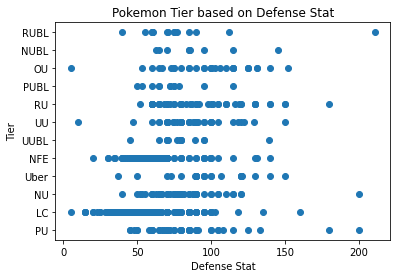

In [45]:
x = data["Defense"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Defense Stat")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on Defense Stat")

Text(0.5, 1.0, 'Pokemon Tier based on Sp. Atk Stat')

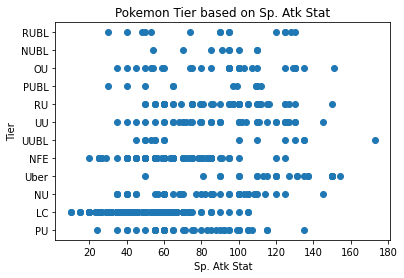

In [46]:
x = data["Sp. Atk"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Sp. Atk Stat")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on Sp. Atk Stat")

Text(0.5, 1.0, 'Pokemon Tier based on Sp. Def Stat')

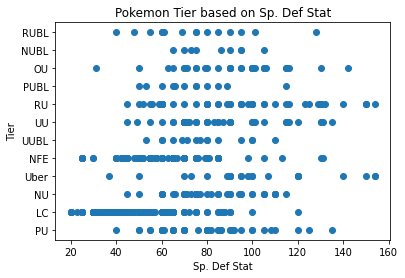

In [47]:
x = data["Sp. Def"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Sp. Def Stat")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on Sp. Def Stat")

Text(0.5, 1.0, 'Pokemon Tier based on Speed Stat')

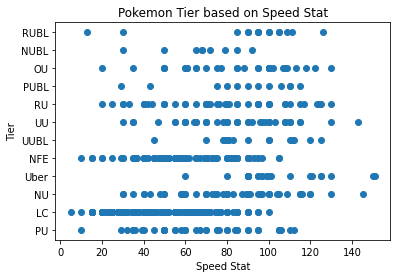

In [48]:
x = data["Speed"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Speed Stat")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier based on Speed Stat")

Text(0.5, 1.0, 'Pokemon Tier Based on Offensive Typing')

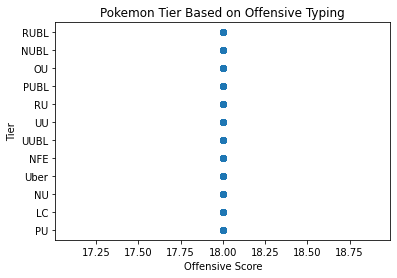

In [49]:
x = data["O-Score"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Offensive Score")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier Based on Offensive Typing")

Text(0.5, 1.0, 'Pokemon Tier Based on Defensive Typing')

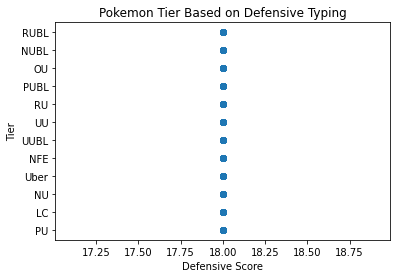

In [50]:
x = data["D-Score"]
y = data["Tier"]

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Defensive Score")
ax.set_ylabel("Tier")
ax.set_title("Pokemon Tier Based on Defensive Typing")

In [51]:
data.tail()

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
3433,7,Zoroark,RUBL,60,105,60,120,60,105,18,18,510
3434,7,Zorua,LC,40,65,40,80,40,65,18,18,330
3435,7,Zubat,LC,40,45,35,30,40,55,18,18,245
3436,7,Zweilous,NFE,72,85,70,65,70,58,18,18,420
3437,7,Zygarde,Uber,108,100,121,81,95,95,18,18,600
